# Data Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes and how does HR Analytics help in analyzing attrition? we will write the code and try to understand the process step by step.

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset from github

df=pd.read_csv('WA_fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Totally, We have a 35 columns in the dataset and Attrition column is the target column but It's in second column. Hence we moved to last for better understanding for Upcoming steps.

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

We have a 35 columns but all the columns is not visible to understand. Hence, I have run the above code to view all the columns to understand.

In [4]:
df=df[['Age','BusinessTravel','DailyRate','Department','DistanceFromHome','Education','EducationField','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus', 'MonthlyIncome','MonthlyRate','NumCompaniesWorked','Over18','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition']]
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


We have rearraged the dataframe becasue Attrition column is the target column. Hence we moved to last for better understanding.

Also, I can see the 4 columns("EmployeeCount","Over18","PerformanceRating","StandardHours") which have a constent value. If it is same value for all the row then we can remove the column from the dataset. However, we will check the uniqueness in next step.

# Checking Unique Value only in doubtfull column

In [5]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

In [6]:
df["Over18"].unique()

array(['Y'], dtype=object)

In [7]:
df["PerformanceRating"].unique()

array([3, 4], dtype=int64)

In [8]:
df["StandardHours"].unique()

array([80], dtype=int64)

From the above result - We can see unique in 3 columns(each have only one value) out of 4 columns. So, I have decided to drop this 3 columns("EmployeeCount","Over18","StandardHours") because this three having standard info. Also, If we encoded and scaling then it might be affect the model accuracy. Hence droping the columns in next step.

In [9]:
df=df.drop(['EmployeeCount','Over18','StandardHours'],axis=1)
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

We have successfully removed that three columns from the dataset

In [10]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

We have a 32 columns out of that I have mentioned the data types below for better understanding:

8 Columns("Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime") in object type - We will label encoded with in futher steps.

24 columns ('Age','DailyRate','DistanceFromHome','Education','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager') in Integer type - We can visualize this data in future step

In [11]:
df.shape

(1470, 32)

We have a 1470 rows and 32 column in the dataset.

# Checking Null Value

In [12]:
df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

We don't have a null value in the dataset. However, I will ensure with heatmap in next step.

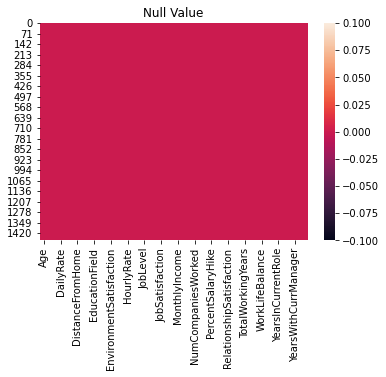

In [13]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

Making the Dataframe for Visualization of Nominal data which is categorical

In [14]:
dvn=df[["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"]].copy()

No     1233
Yes     237
Name: Attrition, dtype: int64


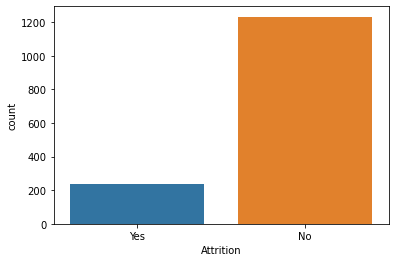

In [15]:
A=sns.countplot(x="Attrition",data=dvn)
print(dvn["Attrition"].value_counts())

Based on the above info - We have a attrition around 237 rows in the dataset

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


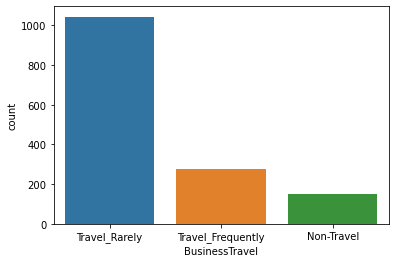

In [16]:
A=sns.countplot(x="BusinessTravel",data=dvn)
print(dvn["BusinessTravel"].value_counts())

Based on the above info - We have a business Travel Details which is Travel_Rarely=1043, Travel_Frequently is 277 & Non_Travel is 150.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


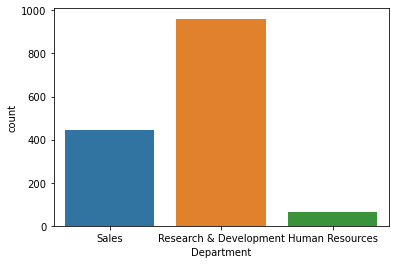

In [17]:
A=sns.countplot(x="Department",data=dvn)
print(dvn["Department"].value_counts())

We have a details about the Department - R&D count is 961, Sales is 446 and H&R is 63.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


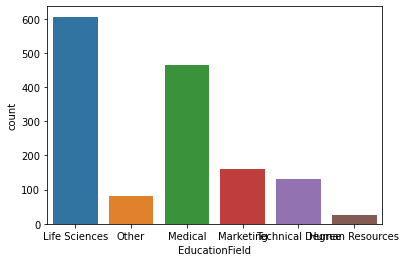

In [18]:
A=sns.countplot(x="EducationField",data=dvn)
print(dvn["EducationField"].value_counts())

Life Science is 606, Medical is 464, Marketing is 159, Technical Degree is 132, Other is 82 and HR is 27 - We have a EducationField details.

Male      882
Female    588
Name: Gender, dtype: int64


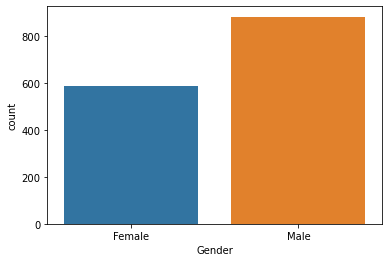

In [19]:
A=sns.countplot(x="Gender",data=dvn)
print(dvn["Gender"].value_counts())

Based on the above info - Male count is 882 and Female is 588. Male count is high in the dataset.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


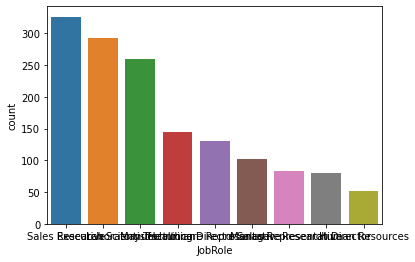

In [20]:
A=sns.countplot(x="JobRole",data=dvn)
print(dvn["JobRole"].value_counts())

We have a dataset in the JobRole - Sale Executive is 326, Research Scientist is 292, Lab Technician is 259, Manufacturig Director is 145, Healthcare Representative is 131, Manager is 102, Sales Representative is 83, Research Director is 80 and HR is 52.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


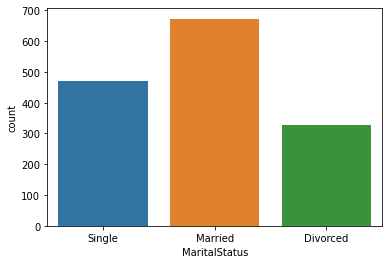

In [21]:
A=sns.countplot(x="MaritalStatus",data=dvn)
print(dvn["MaritalStatus"].value_counts())

Based on the above info - We can see the Marital Status which are Married person-673, Single-470, Divorced-327.

No     1054
Yes     416
Name: OverTime, dtype: int64


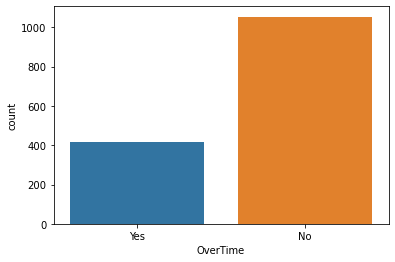

In [22]:
A=sns.countplot(x="OverTime",data=dvn)
print(dvn["OverTime"].value_counts())

We have a Overtime details in the above - Overtime Employee is 416 & Non_Overtime Employee is 1054.

# Encoding the Dataframe:

In [23]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2.0,1102,2.0,1,2,1.0,1,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5,1.0
1,49,1.0,279,1.0,8,1,1.0,2,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7,0.0
2,37,2.0,1373,1.0,2,2,4.0,4,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0,1.0
3,33,1.0,1392,1.0,3,4,1.0,5,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0,0.0
4,27,2.0,591,1.0,2,1,3.0,7,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2,0.0


We are not changing all the columns for Ordinal encoder becasue we have only eight columns as Ordinal encoder hence we did only for that five columns.

# Describe Dataset

In [24]:
#Statistical Summary
df.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


We have a outlier and skewness. So we will check in further step

# Correlation Checking:

In [25]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
BusinessTravel,0.024751,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.000074
DailyRate,0.010661,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
Department,-0.031882,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,0.063991
DistanceFromHome,-0.001686,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EducationField,-0.040873,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,0.026846
EmployeeNumber,-0.010145,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.010336,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
Gender,-0.036311,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.022556,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,0.029453


Correlation using heatmap

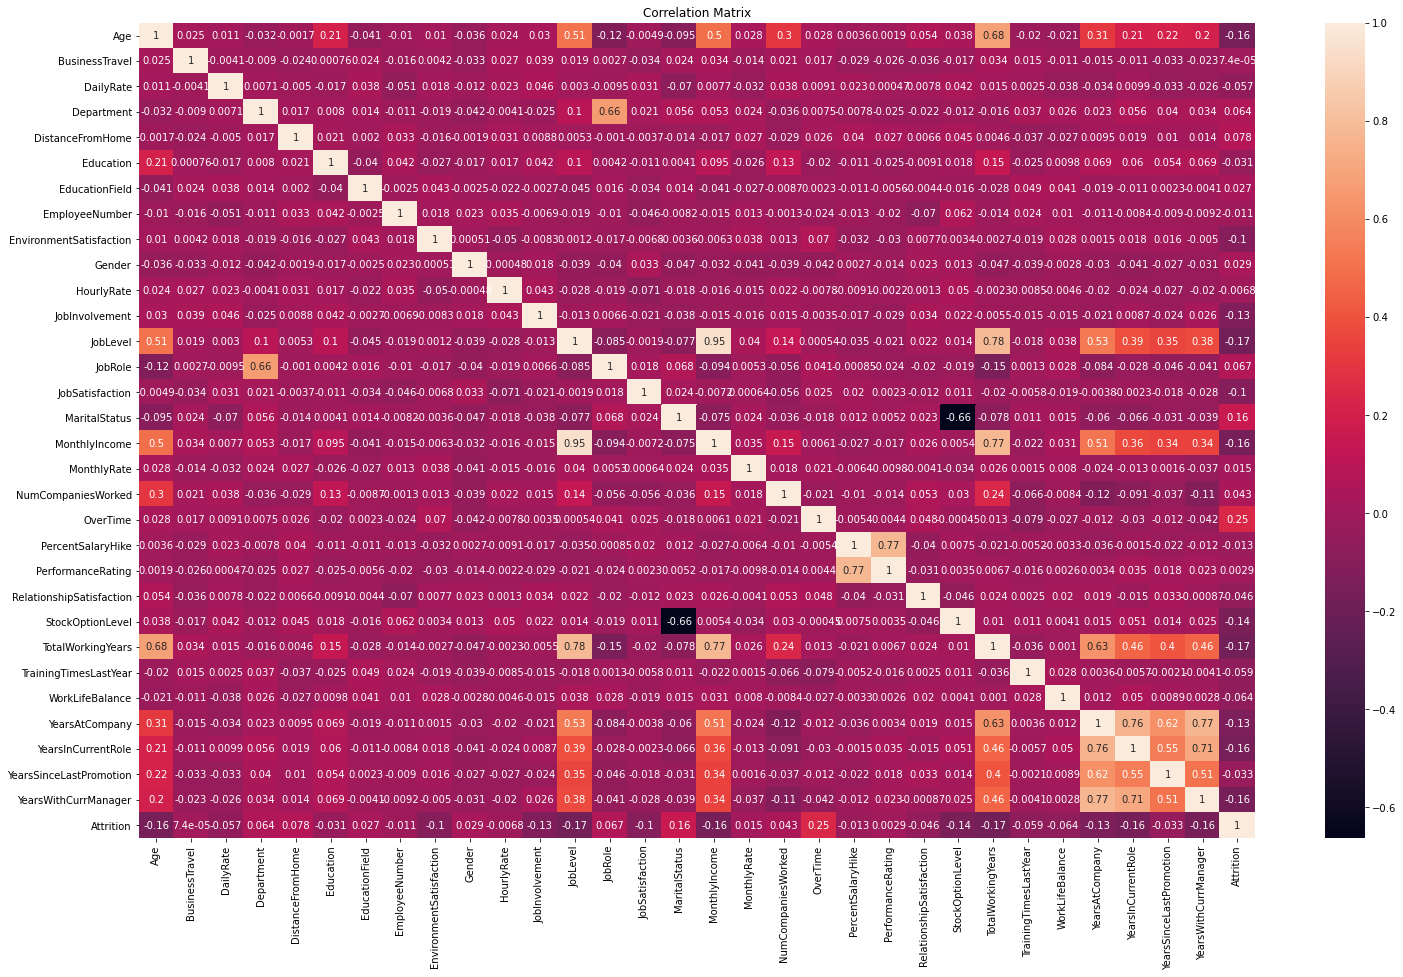

In [26]:
corr_mat=df.corr()

plt.figure(figsize=[25,15])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Here, we can see the highest correlation with OverTime column is 25%.

# Outlier Checking 

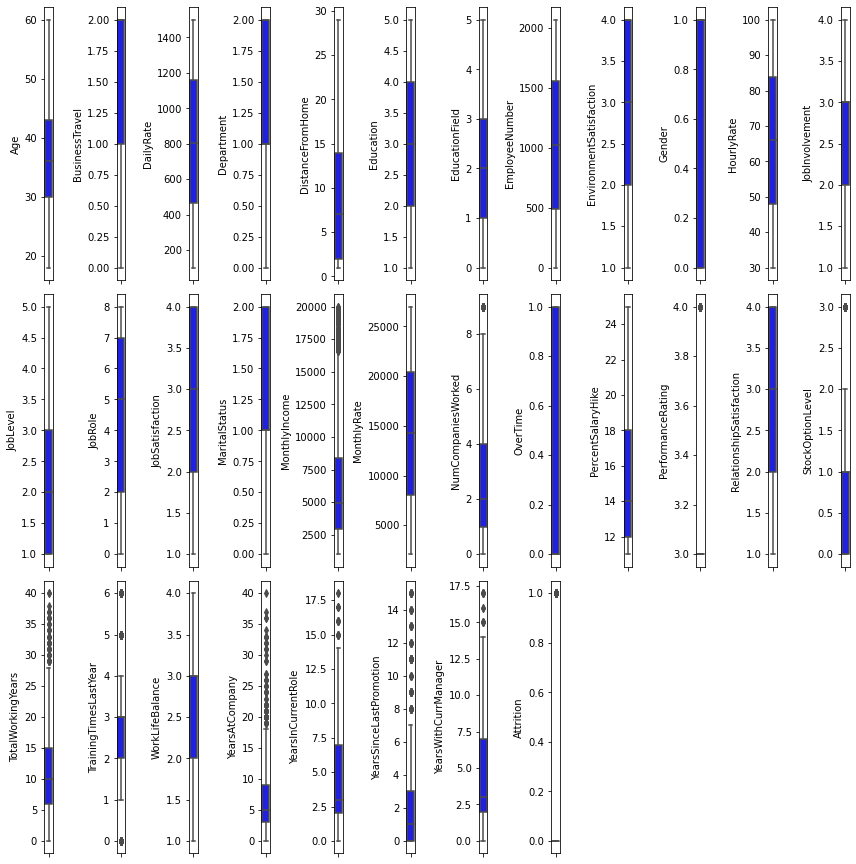

In [27]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a outlier in Eleven columns which are "MonthlyIncome","NumCompaniesWorked","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","Attrition". In that we can leave Attrition columns because It is categorical data. So, we will rectify in further step

# Checking Skewness

In [28]:
df.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

From the above info - we can see the skewness in the dataset. But we need to skip the columns which we have encoded as int. Because those are categorical based We won't consider that columns having skewness.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1470, 32)

In [30]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [31]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1470, 32)
(1387, 32)


In [32]:
Loss_percentage=(1470-1387)/1387*100
print(Loss_percentage)

5.984138428262437


Actually, We are having a 6%(rounded Off) dataloss in the dataset which are good to go for further step.

In [33]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

We are spliting the dataset which are X is feature and Y is target.

# Data Transform for Remove Skewness

In [34]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [35]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)
x

array([[ 0.61013332,  0.63872976,  0.75061538, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.37182973, -1.38077628, -1.34337244, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.18248603,  0.63872976,  1.33708042, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.0804891 ,  0.63872976, -1.75453754, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.37182973, -1.38077628,  0.57328582, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.16377603,  0.63872976, -0.37222758, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

# Finding the Model and Random State:

I have choosed the logistic Regression because outcome has a two variable. Hence, I am going with classification Model.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 91.26637554585153 on Random state 330


I have created the test size for 33% to find the best random state and Accuracy score. Finally, We got 91% accuracy score and Random state is 330.

# Creating Train-Test Split

In [37]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.33,random_state=330)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.9126637554585153
[[386  12]
 [ 28  32]]
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       398
         1.0       0.73      0.53      0.62        60

    accuracy                           0.91       458
   macro avg       0.83      0.75      0.78       458
weighted avg       0.91      0.91      0.91       458



In [39]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.7860262008733624
[[336  62]
 [ 36  24]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       398
         1.0       0.28      0.40      0.33        60

    accuracy                           0.79       458
   macro avg       0.59      0.62      0.60       458
weighted avg       0.82      0.79      0.80       458



In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.8930131004366813
[[393   5]
 [ 44  16]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       398
         1.0       0.76      0.27      0.40        60

    accuracy                           0.89       458
   macro avg       0.83      0.63      0.67       458
weighted avg       0.88      0.89      0.87       458



In [41]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)
prd=svc.predict(x_test)
print (accuracy_score(Y_test, prd))
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

0.8973799126637555
[[394   4]
 [ 43  17]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       398
         1.0       0.81      0.28      0.42        60

    accuracy                           0.90       458
   macro avg       0.86      0.64      0.68       458
weighted avg       0.89      0.90      0.88       458



Random Forest score is - 89%
Decision Tree score is - 79%
Logistic Regression Score is - 91%
SVC score is - 90%
We are getting the high accuracy with Logistic Regression model is 91%. It will be cross check with CV.

# Finding the best CV value:

In [42]:
from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score=cross_val_score(LR,x,Y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At score fold {j} is having the CV_Score is {cv_mean}")

At score fold 2 is having the CV_Score is 0.8601297037896461
At score fold 3 is having the CV_Score is 0.8723847546741715
At score fold 4 is having the CV_Score is 0.8651821558861255
At score fold 5 is having the CV_Score is 0.8702205022985222
At score fold 6 is having the CV_Score is 0.8723783400507538
At score fold 7 is having the CV_Score is 0.8745386383577338
At score fold 8 is having the CV_Score is 0.8723714371138129
At score fold 9 is having the CV_Score is 0.8716426942233393


Based on the above high score of Loistic Regression. I have runned with LR to find best cv value. Here, I choosed cv=5 is best. Hence. will check the cross validation other model.

In [43]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=5)
scr=cross_val_score(DT,x,Y,cv=5)
sc=cross_val_score(RF,x,Y,cv=5)
scor=cross_val_score(svc,x,Y,cv=5)
print("Cross Validation Score of LR :",score.mean()*100)
print("Cross Validation Score of DT :",scr.mean()*100)
print("Cross Validation Score of RF :",sc.mean()*100)
print("Cross Validation Score of svc :",scor.mean()*100)

Cross Validation Score of LR : 87.02205022985223
Cross Validation Score of DT : 78.08118847881984
Cross Validation Score of RF : 85.29153572448898
Cross Validation Score of svc : 86.73454016570136


Minimum Difference in accuracy and cross_validation score is for Decision Tree is (1%). So, this is best model

# AUC ROC Curve:

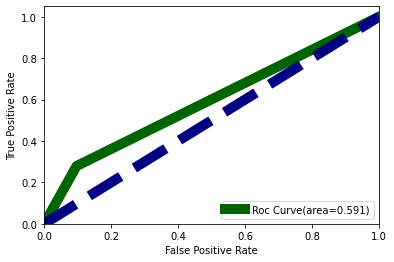

In [44]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(prid,Y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="darkgreen",lw=10,label='Roc Curve(area=%0.3f)'%roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Hyper Parameter Tuning

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DT,parameters,cv=5)
GCV.fit(x_train,Y_train)
print(GCV.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [46]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=2)
DT.fit(x_train,Y_train)
DT.score(x_train,Y_train)
predict=DT.predict(x_test)
AC=accuracy_score(Y_test,predict)
print("DecisionTree Score :",AC*100)

cv_score=cross_val_score(DT,x,Y,cv=5)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

DecisionTree Score : 85.80786026200873
CV Score : 84.5713321039919


# Model Saving

In [47]:
import pickle
filename='HR_Analysis.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [48]:
Loaded_load = pickle.load(open('HR_Analysis.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.8930131004366813


In [50]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],predict[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457
Predicted,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Original,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

We have a the outcome for this model with 89%(rounded Off) score.